# Problem Sheet 1
## 1.1

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

We first define our Integral approximations:

In [47]:

def T(f, N):
    Integral = 0
    i = 0
    h = 1/N
    while i < N:
        Integral = Integral + f(i*h) + f((i+1)*h)
        i = i + 1
    return Integral*h/2

def R(f, N):
    Integral = 0
    i = 0
    h = 1/N
    while i < N:
        Integral = Integral + f(i*h)
        i = i + 1
    return Integral*h


Then we define all of our required functions:

In [48]:
# Our actual mathematical function
def f(x):
    return math.e**x

# Stepcount: used for calculating the step sizes
def N(i):
    return 2**i

#the error for Trapezoidal Rule
def err_T(i, f):
    return math.e - 1 - T(f, N(i))

#the error for Box Rule
def err_R(i, f):
    return math.e - 1 - R(f, N(i))

Now we iterate through all of our different step counts:

In [49]:
h = [1/N(i) for i in range(0,10)]
abs_error_T = [abs(err_T(i, f)) for i in range(1,11)]
abs_error_R = [abs(err_R(i, f)) for i in range(1,11)]

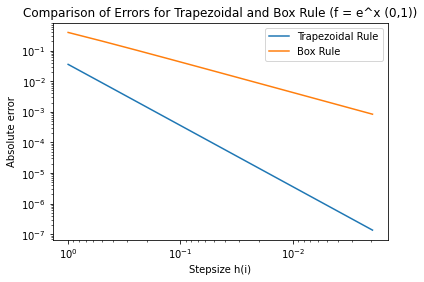

In [50]:
fig, ax = plt.subplots()
ax.loglog(h,abs_error_T, label='Trapezoidal Rule')
ax.loglog(h,abs_error_R, label='Box Rule')
ax.set(xlabel='Stepsize h(i)', ylabel='Absolute error', title='Comparison of Errors for Trapezoidal and Box Rule (f = e^x (0,1))')
ax.invert_xaxis()
plt.legend()

We can observe the linear behavior for Box Rule and the quadratic behavior for Trapezoidal rule (Ch^2).

## 1.2

$$ T(\frac{h}{2}) - T(h) = Ch^2 - \frac{Ch^2}{4} = \frac{3}{4}Ch^2  $$

$$ C = \frac{4}{3}(T(\frac{h}{2})-T(h))\frac{1}{h^2} $$

In [51]:
N_estimator = 10

C = (4/3)*(1/N_estimator)**(-2)*(T(f,2*N_estimator) - T(f,N_estimator))

print(C)

-0.14316032854576238


In [53]:
h = [1/N(i) for i in range(1,11)]
error_estimate_ratio = [err_T(i, f)/(C*h[i-1]**2) for i in range(1,11)]

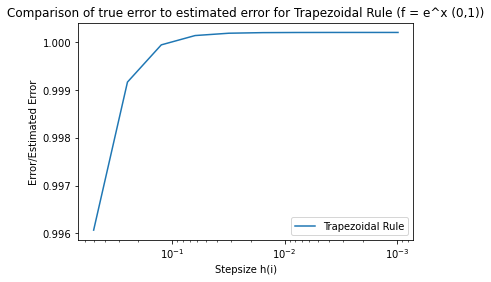

In [54]:
fig2, ax2 = plt.subplots()
ax2.semilogx(h,error_estimate_ratio, label='Trapezoidal Rule')
ax2.set(xlabel='Stepsize h(i)', ylabel='Error/Estimated Error', title='Comparison of true error to estimated error for Trapezoidal Rule (f = e^x (0,1))')
ax2.invert_xaxis()
plt.legend()

## 1.3

### a)
##### Data Points: (0,0), (1,2), (4,8)

##### Lagrange Polynomial:

$$ P(x) = \sum_{i=0}^nf_il_i(x) $$

$$ l_i(x) = \prod_{j=0,j\neq i}^n \frac{x - x_j}{x_i - x_j} $$

$$ p(x) = -2x\frac{x - 4}{3} + 8\frac{x}{4}\frac{x-1}{3} $$

$$ = - \frac{2x^2}{3} + \frac{8x}{3} + \frac{2x^2}{3} -\frac{2x}{3} $$

$$ = 2x $$

### b)

##### LSE:

$$ I : 0 = a_0 $$
$$ II :2 = a_0 + a_1 + 4a_2$$
$$ III :8 = a_0 +4a_1 + 16a_2 $$

$a_0 = 0$

system is underdefined (III = 4*II) so we choose (for our polynomial):

$a_2 = 0$

and get:

$a_1 = 2$

##### switching to numpy:



In [55]:
polyn_coeff = np.polyfit([0,1,4],[0,2,8], 2)
vals = np.polyval(polyn_coeff, [0,1,4])

In [56]:
print(polyn_coeff)
print(vals)

[7.41325219e-16 2.00000000e+00 7.13708072e-16]
[7.13708072e-16 2.00000000e+00 8.00000000e+00]


## 1.4

In [57]:
def polynomial_interpolation(x, f, n):
    coeff = np.polyfit(x, f, n)
    return np.polyval(coeff,0)
    
def f(x):
    return (math.e**x - 1)/x

def calculate_Neville_Scheme(f, m: int, n: int):
    knots = [2**-i for i in range(11)]
    print(knots)
    data = [f(knot) for knot in knots]
    Neville_Scheme = np.ones((m+1,n+1))
    for j in range(m+1):
        for k in range(n+1):
            Neville_Scheme[j][k] = polynomial_interpolation(knots[j:j+k+1],data[j:j+k+1],k)
    return Neville_Scheme

In [58]:
m = 10
n = 2
N = calculate_Neville_Scheme(f,m,n)
print(N)

[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]
[[1.71828183 0.87660325 1.00747997]
 [1.29744254 0.97476079 1.00077785]
 [1.13610167 0.99427358 1.00008889]
 [1.06518762 0.99863506 1.00001063]
 [1.03191134 0.99966674 1.0000013 ]
 [1.01578904 0.99991766 1.00000016]
 [1.00785335 0.99997954 1.00000002]
 [1.00391644 0.9999949  1.        ]
 [1.00195567 0.99999873 1.        ]
 [1.0009772  0.99999968 0.88592347]
 [1.00048844 0.50024422 0.33349615]]


C:\Users\andre\AppData\Local\Temp\ipykernel_13100\2994624833.py:15: RankWarning: Polyfit may be poorly conditioned
  Neville_Scheme[j][k] = polynomial_interpolation(knots[j:j+k+1],data[j:j+k+1],k)
C:\Users\andre\AppData\Local\Temp\ipykernel_13100\2994624833.py:15: RankWarning: Polyfit may be poorly conditioned
  Neville_Scheme[j][k] = polynomial_interpolation(knots[j:j+k+1],data[j:j+k+1],k)
C:\Users\andre\AppData\Local\Temp\ipykernel_13100\2994624833.py:15: RankWarning: Polyfit may be poorly conditioned
  Neville_Scheme[j][k] = polynomial_interpolation(knots[j:j+k+1],data[j:j+k+1],k)


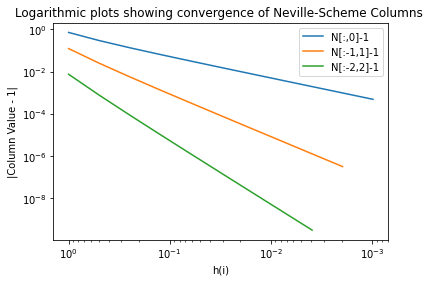

In [454]:
knots = [2**-i for i in range(11)]
fig3, ax3 = plt.subplots()
ax3.loglog(knots[:],abs(N[:,0]-1), label='N[:,0]-1')
ax3.loglog(knots[:-1],abs(N[:-1,1]-1), label='N[:-1,1]-1')
ax3.loglog(knots[:-2],abs(N[:-2,2]-1), label='N[:-2,2]-1')
ax3.set(xlabel='h(i)', ylabel='|Column Value - 1|', title='Logarithmic plots showing convergence of Neville-Scheme Columns ')
ax3.invert_xaxis()
plt.legend()

## 1.5

$$ f(x) = sin(x) $$

First the Taylor-Polynomial at x0 = 0

$$ x_0 = 0 \ \ \ f(x) \approx x $$

Then at x0 = pi/2

$$ x_0 = \frac{\pi}{2} \ \ \ f(x) \approx 1 - \frac{1}{2}(x-\frac{\pi}{2})^2$$

$$ f(x) \approx 1 - \frac{1}{2}x^2 + \frac{\pi x}{2} - \frac{\pi^2}{8} $$

$$ f(x) \approx -0.5x^2 - 0.5 \pi x -0.2337 $$

Comparing this with the polynomial from the lecture:

$$f(x) \approx 1.164x - 0.3357x^2$$

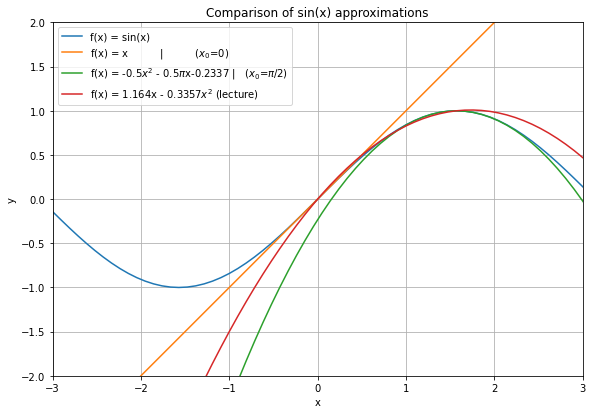

In [46]:
x = np.linspace(-1.5*math.pi,1.5*math.pi,100)
y1 = -0.5*x**2 + 0.5*math.pi*x - (math.pi**2)/8 +1
y2 = 1.164*x - 0.3357*x**2
y3 = np.sin(x)
y4 = x

fig, ax = plt.subplots()
ax.plot(x,y3, label='f(x) = sin(x)')
ax.plot(x,y4, label='f(x) = x          |          ($x_0$=0)')
ax.plot(x,y1, label='f(x) = -0.5$x^2$ - 0.5$\pi$x-0.2337 |   ($x_0$=$\pi$/2)')
ax.plot(x,y2, label='f(x) = 1.164x - 0.3357$x^2$ (lecture)')
fig.set_size_inches(9.5, 6.5)

ax.set(xlabel='x', ylabel='y', title='Comparison of sin(x) approximations')
plt.ylim(-2,2)
plt.xlim(-3,3)
plt.legend()
plt.grid()